<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Lab 7: Computer Vision Fundamentals
## Image Manipulation
Today, we're going to talk through some traditional computer vision and touch on CNNs towards the end. This will not be *directly* used in your HW but will be very important to understanding both the general field of CV and seeing how the traditional tools stack up (similar to running linear regression before doing deep learning).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request
from google.colab.patches import cv2_imshow

Of the imports, the new requirement here is [OpenCV](https://opencv.org/). OpenCV is a package that is heavily used in industry: much of what we are about to implement is provided for you in OpenCV. So, if you were to want to perform any of these tasks beyond the scope of this course, it is very likely you will interact with this package. For the purposes of this project, however, we'll just be using its most basic functionality. Let's get started by loading in a sample image.

Now, let's load in the image and take a look at it (don't worry about the specifics of `opencv`: we'll be giving you all the relevant code, so you won't have to write any of it yourself):

In [ ]:
url = "https://ewscripps.brightspotcdn.com/dims4/default/e666c4b/2147483647/strip/true/crop/1280x720+0+0/resize/1280x720!/quality/90/?url=https%3A%2F%2Fewscripps.brightspotcdn.com%2Fb0%2F82%2Fe97f14ff421ca8ca7d8692e0ecdb%2Fgeneric-1280-1.png"
urllib.request.urlretrieve(url, "bear.png")

('bear.png', <http.client.HTTPMessage at 0x7fe016705910>)

Now, let's load in the image and take a look at it (don't worry about the specifics of `opencv`: we'll be giving you all the relevant code, so you won't have to write any of it yourself):

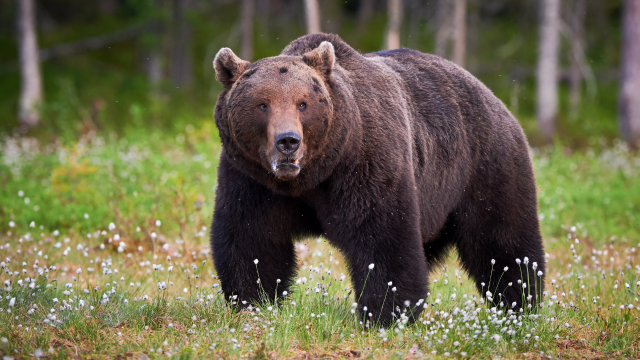

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread("bear.png")
img = cv2.resize(img, None, fx=0.5, fy=0.5)
cv2_imshow(img)

One very important point is knowing *how* this image is represented. Let's take a look at that:

In [ ]:
#############################################################################
# Exercise                                                              #
# Print the type and shape of this img object
#############################################################################
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(360, 640, 3)


Turns out, images are nothing more than numpy arrays! This may seem a bit surprising if you've never seen it as such before, but in its simplest form, an image is nothing more than a matrix of pixel intensities, with each entry corresponding to the intensity of that particular point in the image. As a side note, when you display an image on your computer, the software you are using to render that image (whether it's Preview, Google Chrome, or Photoshop) just knows how to translate those numbers into particular colors.

Returning to the color images, you can visualize these as internally being separated into three layers, which corresponds to the dimension we saw above of `(720, 1280, 3) = (height, width, depth)`, where depth is the number of color channels as expanded in the below image. In almost all cases, you will be dealing with color images (3 channels) or black-and-white images (1 channel). Be aware, however, that you may occasionally come across 4 channel images in practice, where the fourth channel stands for the transparency value of a pixel.

![](https://www.researchgate.net/profile/Konstantinos-Plataniotis/publication/253269938/figure/fig1/AS:298149273980930@1448095734706/Color-image-representation-in-the-RGB-color-domain.png)

### Basic Image Processing
While you will not have to use OpenCV directly, you should know a couple basic things about interacting with images. You should be comfortable with the following tasks:
- Setting pixels in an image
- Iterating over pixels in images
Remember that images are *nothing* more than numpy arrays, so there is nothing different between iterating over arrays and iterating over pixels. But some practice will help solidify this. 

For debugging purposes, it is best to remember the function `cv2_imshow()`. You pass into this function whatever image you want to render. Remember: rendering images is the equivalent of printing in normal programming! With that said, let's start on some basic image properties followed by some basic tasks:

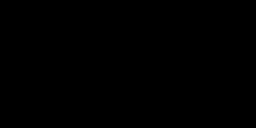

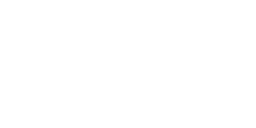

In [ ]:
test_img_black = np.zeros((128, 256, 1)) # 0 represents a black pixel in images
test_img_white = np.ones((128, 256, 1)) * 255 # 1 represents a white pixel in images

cv2_imshow(test_img_black)
cv2_imshow(test_img_white)

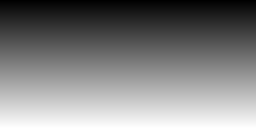

In [ ]:
# iterating over rows and columns is an indispensible tool for images
# sometimes it can be hard to keep track of which dimension is which, but just
# thinking through it slowly helps: the image dims are [height, width, depth]
# where "width" is the number of columns and "height" the number of rows

height, width, depth = test_img_black.shape
for row in range(height):
  # sets the row to a shade of gray: notice that, to index an image, you are
  # indexing image[row, column]
  test_img_black[row, :] = 2 * row
cv2_imshow(test_img_black)

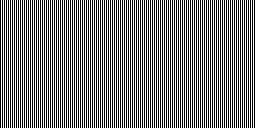

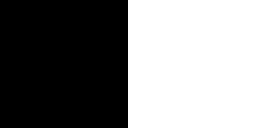

In [ ]:
test_img_black_and_white = np.zeros((128, 256, 1))
test_img_right_white = np.zeros((128, 256, 1))

#############################################################################
# Exercise
#                                                                           #
# 1) Modify the test_img_black_and_white variable above such that it has    #
# black and white pixels in alternating positions for *each* row            #
#                                                                           #
# 2) Modify the test_img_right_white variable above such that its right half#
# are white                                                                 #
#############################################################################

# Replace "pass" statement with your code
height, width, depth = test_img_black_and_white.shape

for column in range(width):
  if column % 2 == 1:
    test_img_black_and_white[:, column] = 255
test_img_right_white[:, width // 2:] = 255

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

cv2_imshow(test_img_black_and_white)
cv2_imshow(test_img_right_white)

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/1/13/Tunnel_View%2C_Yosemite_Valley%2C_Yosemite_NP_-_Diliff.jpg"
urllib.request.urlretrieve(url, "yosemite.png")

('yosemite.png', <http.client.HTTPMessage at 0x7fe121717a90>)

In [ ]:
img = cv2.imread("yosemite.png")
img = cv2.resize(img, None, fx=0.25, fy=0.25)
cv2_imshow(img)

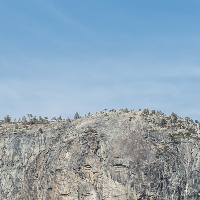

In [ ]:
#############################################################################
# Exercise                                                              #
# Display just the top left 200 x 200 pixels of the above image             
#############################################################################
top_img = img[:200, :200]
cv2_imshow(top_img)

In [ ]:
img_copy = img.copy()

#############################################################################
# [Exercise 2]                                                              #
# Make the bottom right 200x200 of the image black
#############################################################################
img_copy[-200:, -200:] = 0

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
cv2_imshow(img_copy)

In [ ]:
img_copy = img.copy()

#############################################################################
# Exercise                                                              #
# Make every other column black using a for loop
#############################################################################
height, width, _ = img_copy.shape
for col in range(width):
  if col % 2 == 0:
    img_copy[:, col] = 0

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
cv2_imshow(img_copy)

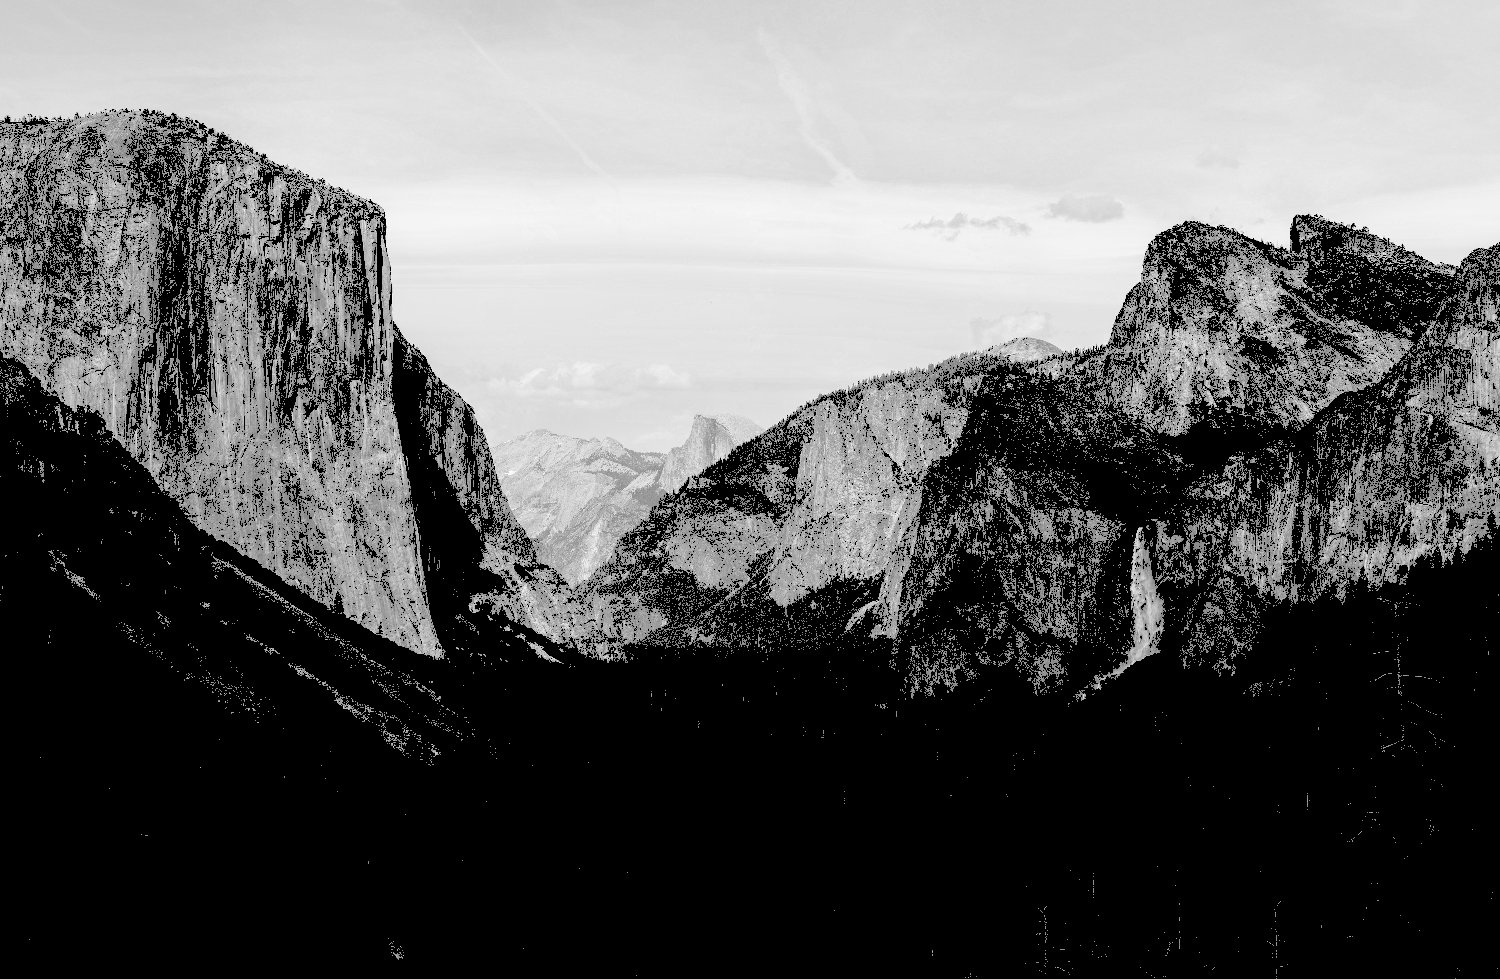

In [ ]:
img_copy = img.copy()

#############################################################################
# Exercise                                                              #
# Make an image where only pixels with pixel intensity > 128 are kept
#############################################################################
height, width, _ = img_copy.shape
for row in range(height):
  for col in range(width):
    pixel = img[row, col, 0]
    if pixel > 128:
      img_copy[row, col] = pixel
    else:
      img_copy[row, col] = 0

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
cv2_imshow(img_copy)

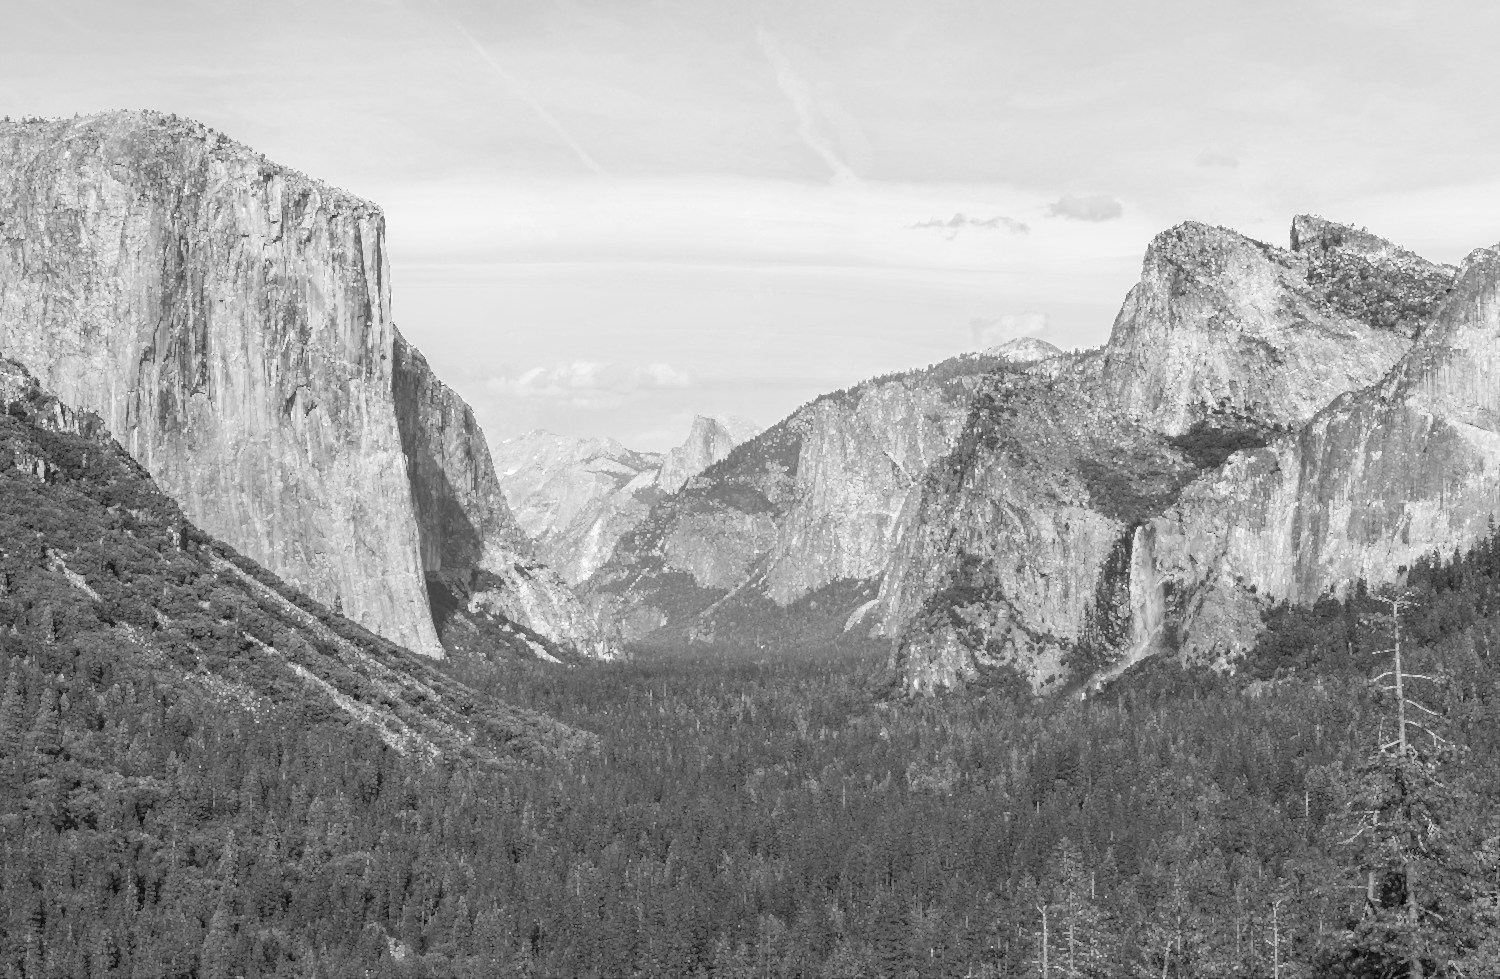

In [ ]:
bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_copy = bw_img.copy()

#############################################################################
# Exercise                                                              #
# Implement 2x2 (max) pooling with basic CV operations
#############################################################################
height, width = img_copy.shape
for row in range(height):
  for col in range(width):
    pixel_range = img[row:row+2, col:col+2]
    img_copy[row, col] = np.max(pixel_range)

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

cv2_imshow(img_copy)

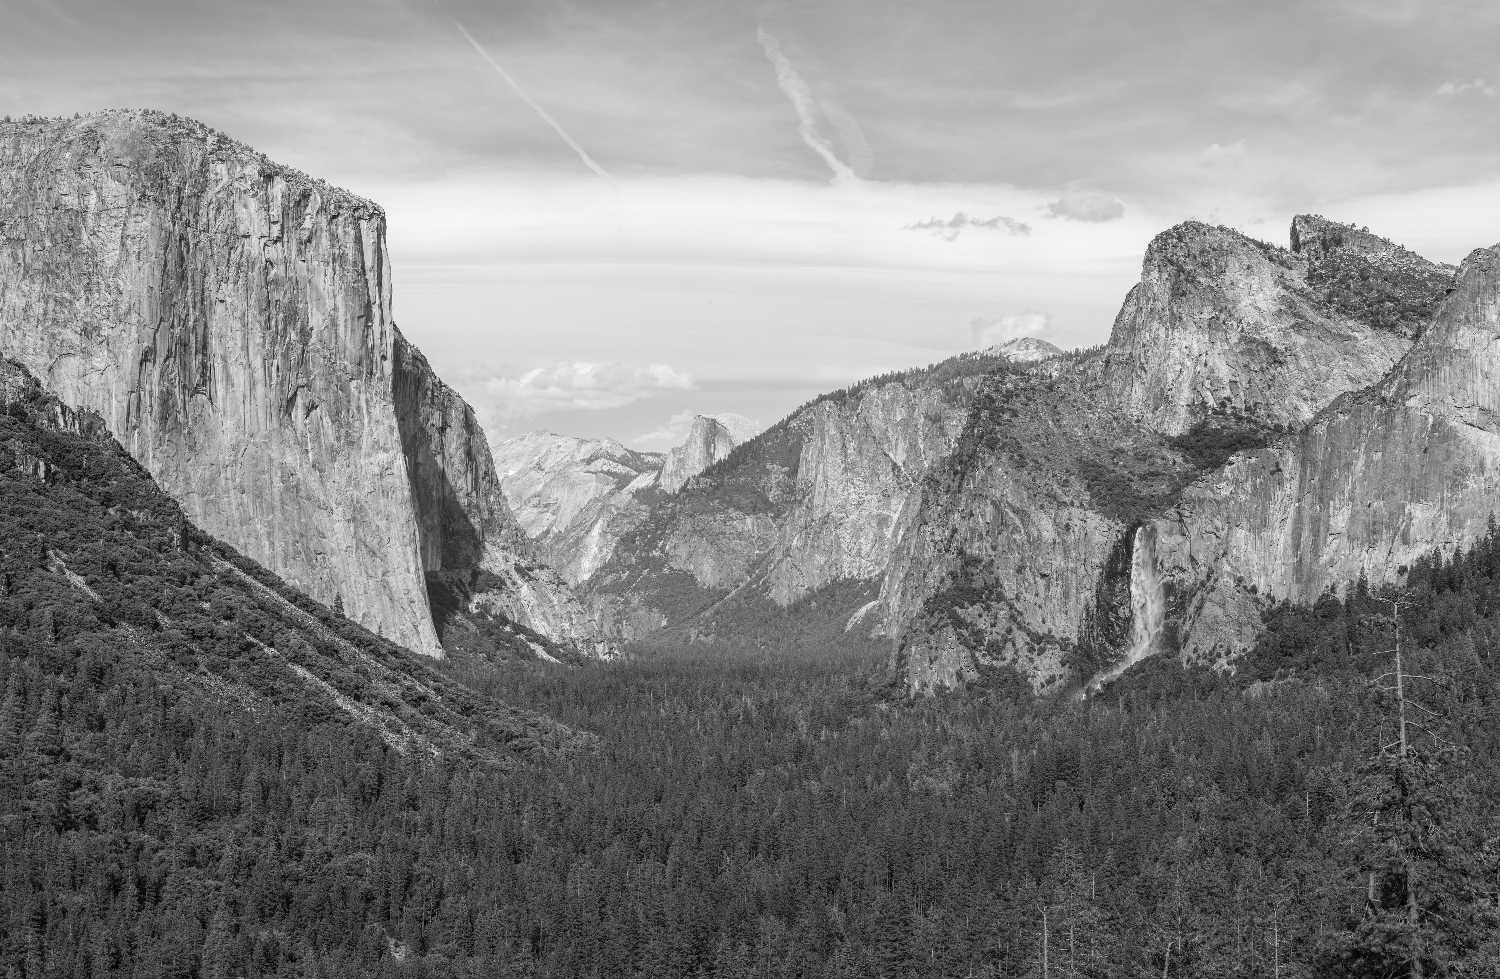

(979, 1500)


In [ ]:
bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(bw_img)
print(bw_img.shape)

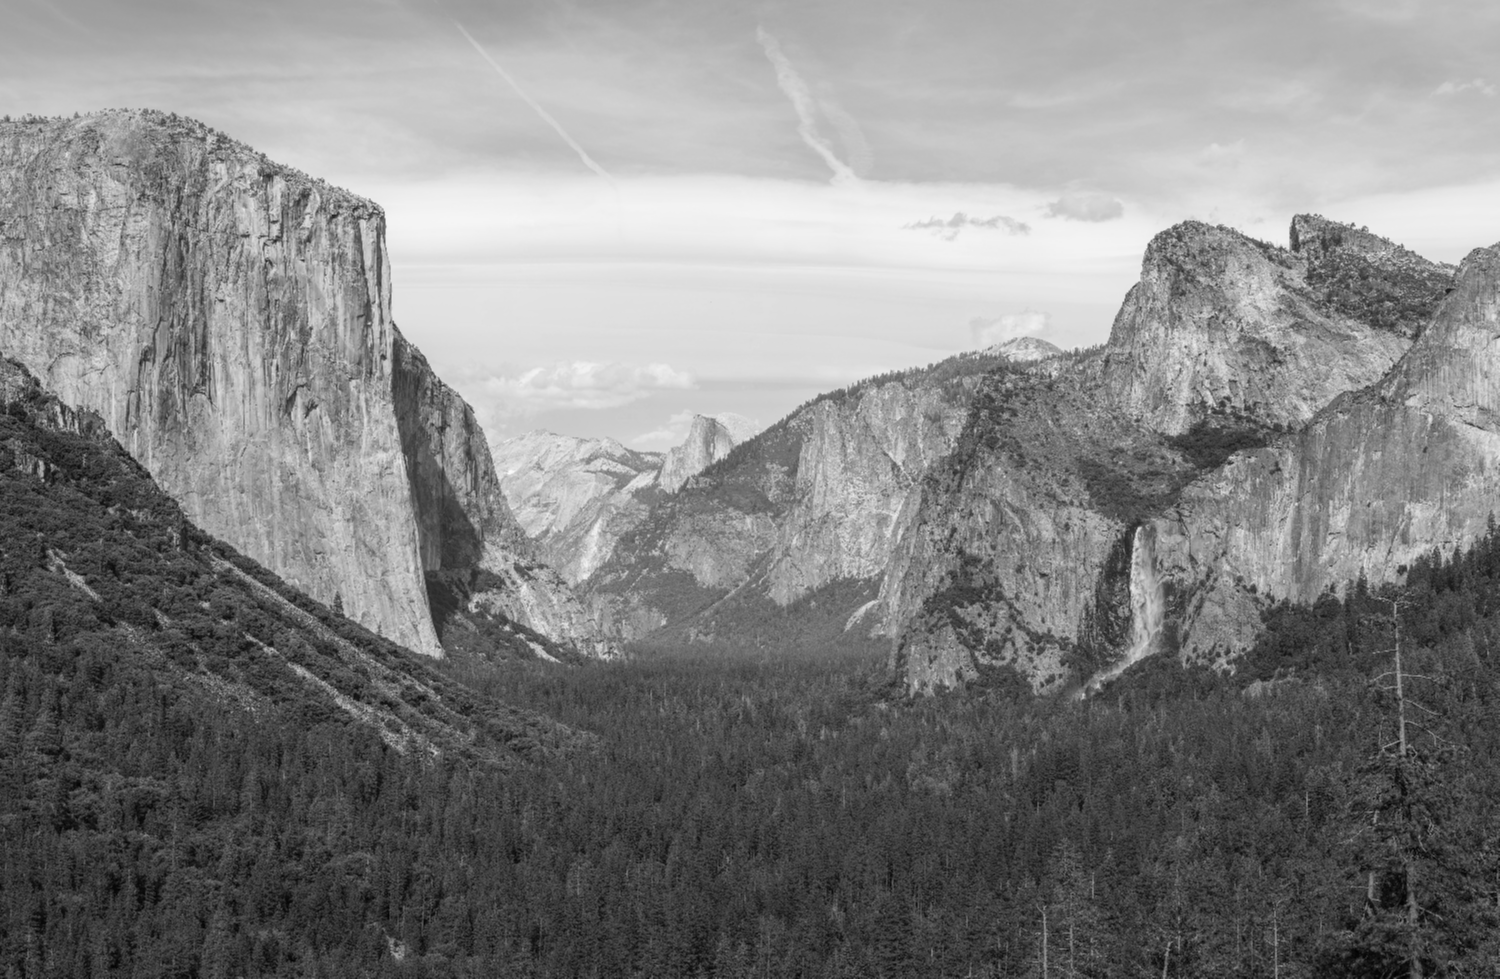

In [ ]:
img_copy = bw_img.copy()

#############################################################################
# Exercise                                                             #
# Implement 2x2 (average) pooling with basic CV operations on the BW image
#############################################################################
height, width = img_copy.shape
for row in range(height):
  for col in range(width):
    pixel_range = img[row:row+2, col:col+2]
    img_copy[row, col] = np.mean(pixel_range)


#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

cv2_imshow(img_copy)

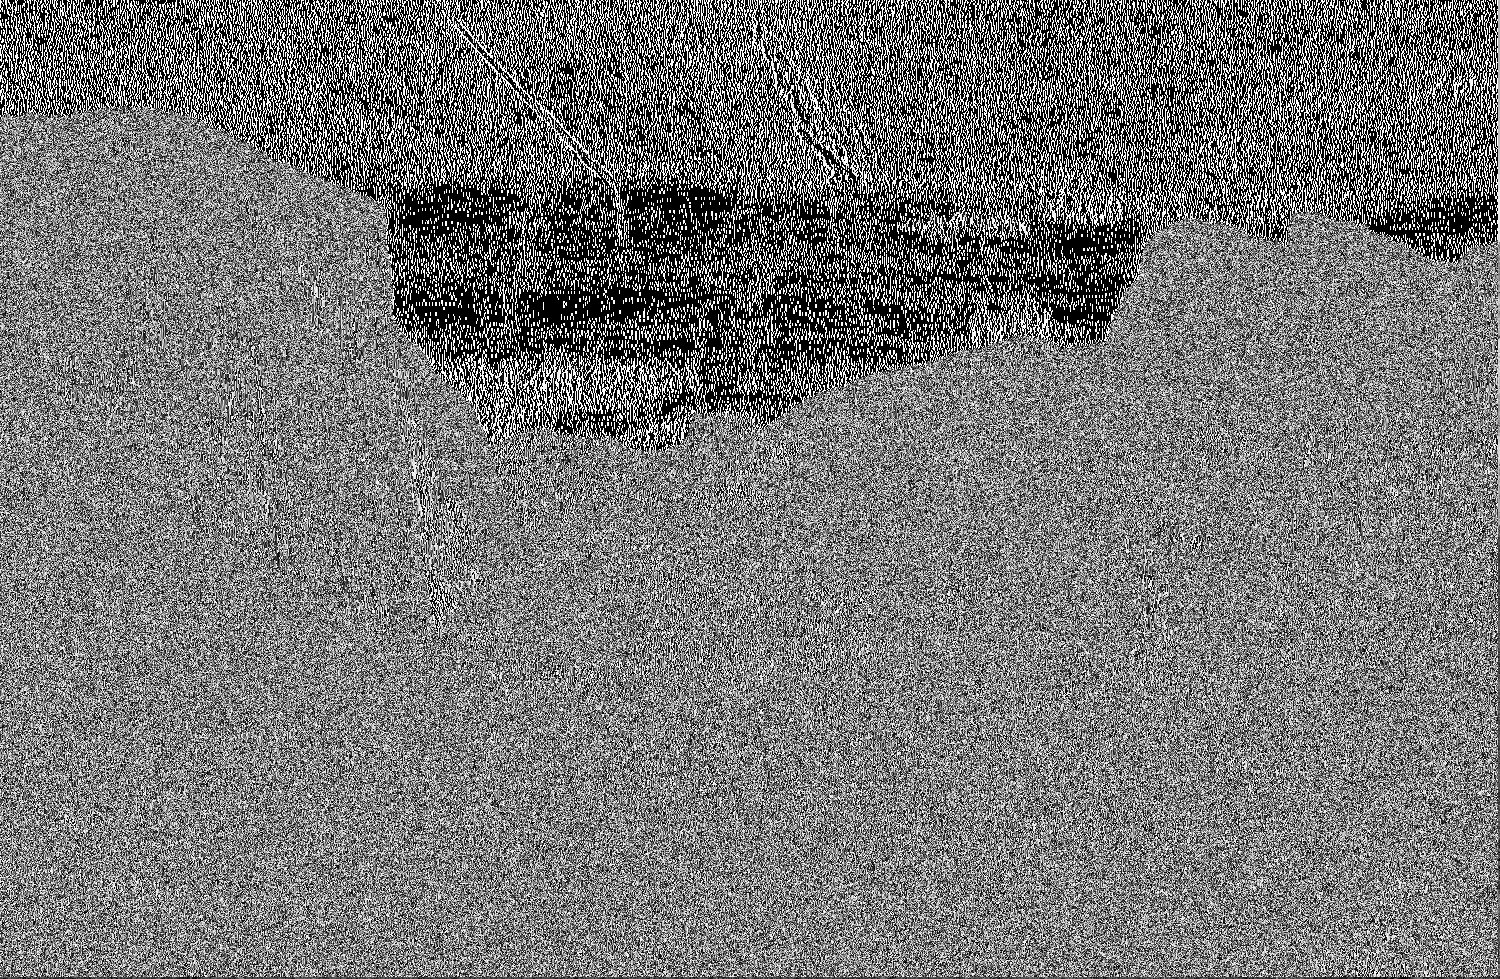

In [ ]:
img_copy = bw_img.copy()
weight = np.array(
    [[-1, 2, -1], 
    [-2, 4, -2], 
    [-1, 2, -1]]
)

#############################################################################
# Exercise                                                              #
# Take each pixel, take its 3x3 block used for max-pooling, multiply 
# (component-wise) the block by the weight matrix given, and put the sum 
# of those weighted values into the img_mystery matrix. 
#############################################################################
height, width = img_copy.shape
for row in range(height - 2):
  for col in range(width - 2):
    pixel_range = img_copy[row:row+3, col:col+3]
    img_copy[row, col] = np.sum(pixel_range * weight)

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

cv2_imshow(img_copy)

This last thing you did is something called a convolution! A convolution is nothing more than a weighted sum of pixels in an image. There is a more complicated mathematical genearalization of this operation, which we will need for the deep learning tie-in later. A convolution is characterized by what is called its "kernel", which is basically the weights associated with the sliding window. In the animation below, the light blue block is the original image, and the highlighted dark blue region the kernel that multiplies the subimage to produce the resulting convolved image.

![](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Kernels can be 1D vectors (just a row) or can be full matrices as shown in this animation. One key thing to see is that what we calculated above with the edge detector can actually be imagined as a convolution with a kernel with weights `[-1 0 1]`! It turns out that convolutions are *extremely* useful for dealing with images, so let's go ahead and implement it. 

One detail with the convolution is figuring out what to do around the border of the image, since you will lose `k_w - 2` pixels when you do the convolution, where `k_w` is the kernel width (since the kernel will "hit" the image walls). The two primary options are to (1) pad the original image to compensate for what we would have otherwise lost or to (2) just convolve the image accepting that the result will be smaller. 

## Convolutions From Scratch
While you will have access to convolutional layers in TF, it is useful to know what is happening underneath the hood. Let's implement a convolution from scratch!

In [ ]:
import scipy
from scipy import signal
random_img = np.random.random((128, 256)) * 255

#############################################################################
# Exercise                                                      #
# Implement 1D and 2D convolutions from scratch. You should NOT do any      #
# padding and simply return an image that is smaller than the original by   #
# the appropriate amount. You can work with vanilla Python lists and simply #
# convert them to Numpy at the end for simplicity                           #
#                                                                           #
# 1) Implement conv1D below. The particulars of how this works is described #
# in the section above. Your results should match the results returned by   #
# the library implementation
#############################################################################

def conv1D(img, kernel):
  height, width = img.shape
  k_width = kernel.shape[0]
  result = []
  num_iter = width - k_width + 1

  for row in img:
    result_row = []
    for i in range(num_iter):
      val = np.dot(np.array(row[i: i + k_width]), np.array(kernel))
      result_row.append(val)
    result.append(np.array(result_row))
  return np.array(result)

def conv2D(img, kernel):
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  result = []
  row_num_iter = height - kernel_height + 1
  col_num_iter = width - kernel_width + 1

  for j in range(row_num_iter):
    result_row = []
    for i in range(col_num_iter):
      val = np.sum(np.array(img[j:j+kernel_height, i:i+kernel_width]) * np.array(kernel))
      result_row.append(val)
    result.append(np.array(result_row))

  return np.array(result)

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

kernel1D = np.array([-1, 0, 3])
kernel2D = np.array(
    [np.array([-1, 1, -1]),
    np.array([1, 0, 1]),
    np.array([-1, 1, -1]),
])

convolved1D_pred = conv1D(random_img, kernel1D)
convolved1D_truth = scipy.signal.convolve2d(random_img, kernel1D[::-1].reshape(1, 3), mode='valid')

convolved2D_pred = conv2D(random_img, kernel2D)
convolved2D_truth = scipy.signal.convolve2d(random_img, np.flipud(np.fliplr(kernel2D)), mode='valid')

print(np.isclose(convolved1D_pred, convolved1D_truth, atol=1e-04).all())
print(np.isclose(convolved2D_pred, convolved2D_truth, atol=1e-04).all())

True
True


### Blurring
As mentioned, the edge detector you have above can implemented with a convolution. However, there are many other operations as well that can be implemented as such. One of these, somewhat surprisingly at first, is image blurring. This comes down to the question: what is blurring at its core?

In reality, blurring is nothing more than a pixel being a weighted sum of its neighbors and itself (with lesser weight place as you get further away). This weighted sum has the same effect as "smudging" the pixels on screen. And this means that a blur is nothing more than a 2D convolution! So, the question simply boils down to: what kernel should we choose?

There is no single kernel that is necessarily the best for blurring, but the one that is most often used is a Gaussian blur kernel, which has elements:

$$
\frac{1}{16}
\begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Larger kernels can be used for "more blurring." For a 5x5 blur, you would use:

$$
\frac{1}{273}
\begin{pmatrix}
1 & 4 & 7 & 4 & 1 \\
4 & 16 & 26 & 16 & 4 \\
7 & 26 & 41 & 26 & 7 \\
4 & 16 & 26 & 16 & 4 \\
1 & 4 & 7 & 4 & 1
\end{pmatrix}
$$

Using these matrices and your `conv2D` implementation from above, perform two blurs on the bear image below:

34.5


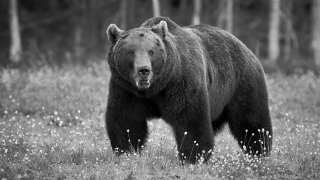

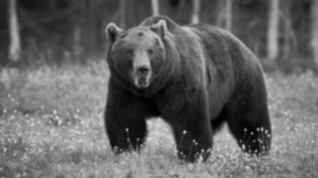

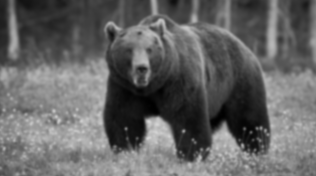

In [ ]:
bear = cv2.imread("bear.png")
bear = cv2.resize(bear, None, fx=0.5, fy=0.5)

bw_bear = cv2.cvtColor(bear, cv2.COLOR_BGR2GRAY)
small_blurred_bw_bear = bw_bear.copy()
large_blurred_bw_bear = bw_bear.copy()

#############################################################################
# Exercise                                                        #
# Using the 3x3 and 5x5 kernels described above and your conv2D function,   #
# run two blurs with Gaussian kernels on the bw_bear image. Store your      #
# results into small_blurred_bw_bear and large_blurred_bw_bear respectively,#
# such that they are visualized below                                       #
#############################################################################

# Replace "pass" statement with your code

kernel2D_small = 1 / 16 * np.array(
    [np.array([1, 2, 1]),
    np.array([2, 4, 2]),
    np.array([1, 2, 1]),
])

kernel2D_large = 1 / 273 * np.array([
    np.array([1, 4, 7, 4, 1]),
    np.array([4, 16, 26, 16, 4]),
    np.array([7, 26, 41, 26, 7]),
    np.array([4, 16, 26, 16, 4]),
    np.array([1, 4, 7, 4, 1]),
])

small_blurred_bw_bear = conv2D(small_blurred_bw_bear, kernel2D_small)
large_blurred_bw_bear = conv2D(bw_bear, kernel2D_large)

print(small_blurred_bw_bear[0,0])

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

cv2_imshow(bw_bear)
cv2_imshow(small_blurred_bw_bear)
cv2_imshow(large_blurred_bw_bear)